# Adut Dataset

The Adult dataset is found in the [UCI Machine Learning Repository (Blake & Merz, 1998)](https://archive.ics.uci.edu/ml/datasets/Adult). This dataset is used to predict whether income exceeds $50K/yr. Besides the target variable, it contains other fourteen attributes based on census data.

| Variable | Description | Values |
|:---|:---|:---|
| age | Age of an individual | Continuous |
| workclass | Employment status of an individual | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,   State-gov, Without-pay, Never-worked |
| fnlwgt | Also known as 'final weight', it's the estimated number of people each   row in the dataset represents | Continuous |
| education | Highest level of education completed | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm,   Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th,   Preschool |
| education_num | Number of years of education | Continuous |
| marital_status | Marital status of an individual | Married-civ-spouse (it refers married to a civilian spouse), Divorced,   Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse   (it refers married to an Armed Forces spouse) |
| occupation | General type of occupation of an individual | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,   Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,   Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,   Armed-Forces |
| relationship | Represents what an individual is relative to others | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried |
| race | Individual's race | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black |
| sex | Individual’s sex | Male, Female |
| capital-gain | Capital gains for an individual | Continuous |
| capital-loss | Capital loss for an individual | Continuous |
| hours-per-week | Hours that an individual works per week | Continuous |
| native-country | Country of origin | United-States, Cambodia, England, Puerto-Rico, Canada, Germany,   Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran,   Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,   Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,   Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,   Trinadad&Tobago, Peru, Hong, Holand-Netherlands |
| **income (target)** | Whether an individual makes more than $50,000 | >50K, <=50K |

There are two files in this dataset we will be using, "adult.data" and "adult.test", with 32561 and 16281 rows, respectively.

# Importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Load datasets

In [2]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, skipinitialspace=True, na_values='?', names=col_names)

In [7]:
df_test['income'] = df_test['income'].apply(lambda x: x[:-1])

# Exploring dataset

In [13]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Null treatment

In [15]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [16]:
df.isna().any(axis=1).sum()

2399

There are three attributes present NaN values: workclass, occupation, and native-country. Out of all 48,842 records, only 3,620 rows have at least one null value, which represents less than 7.5% of the data.  
Because the model can handle missing values as a different category, we will keep them in the dataset.

# Response variable

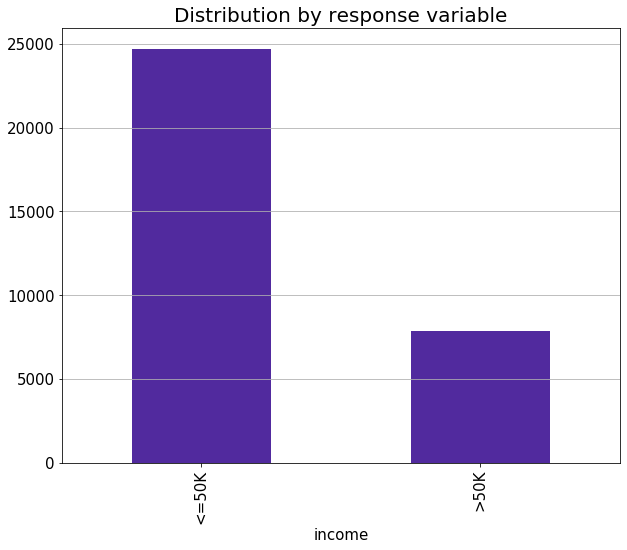

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
df['income'].value_counts().plot.bar(color='#512A9E')
plt.title('Distribution by response variable', fontsize=20)
plt.xlabel('income', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()

In [11]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

We can see that the minority category, '>50K', has 24% of the data.

# Categorical variables

In [18]:
lst_cat_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

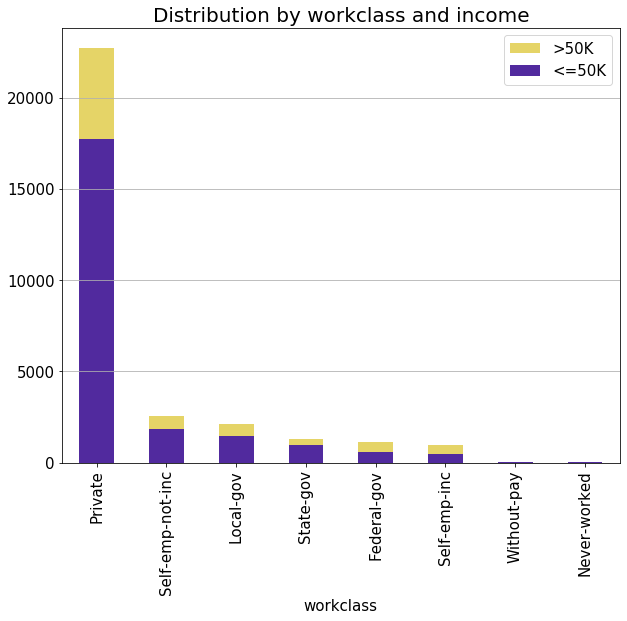

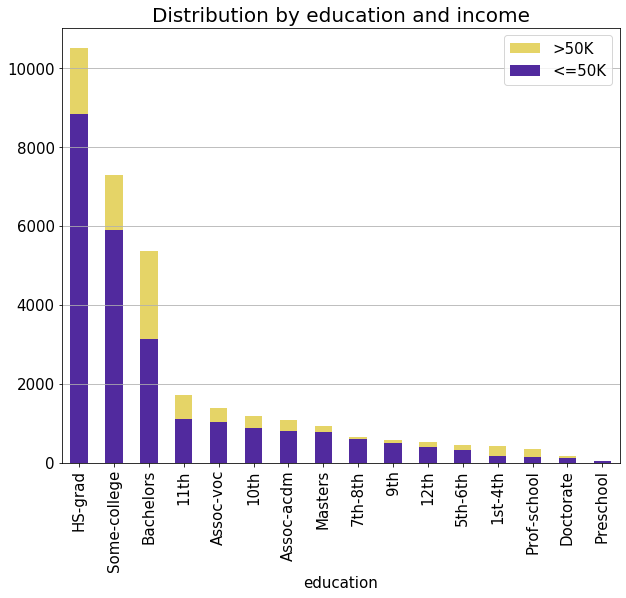

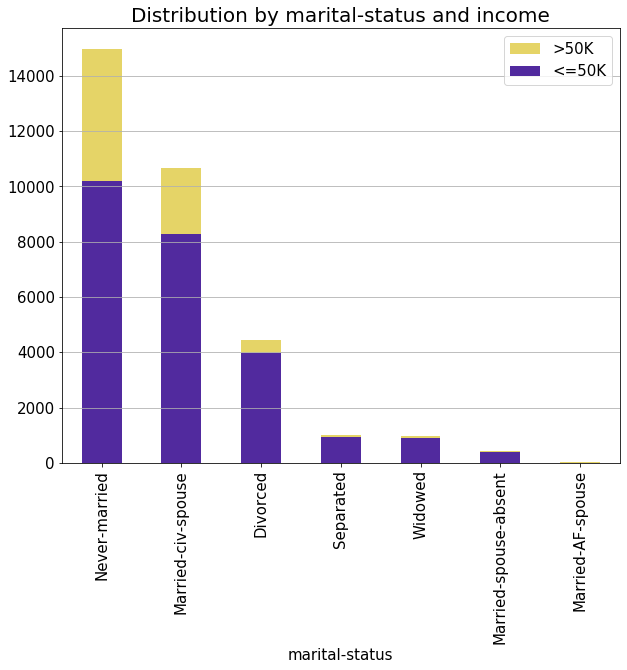

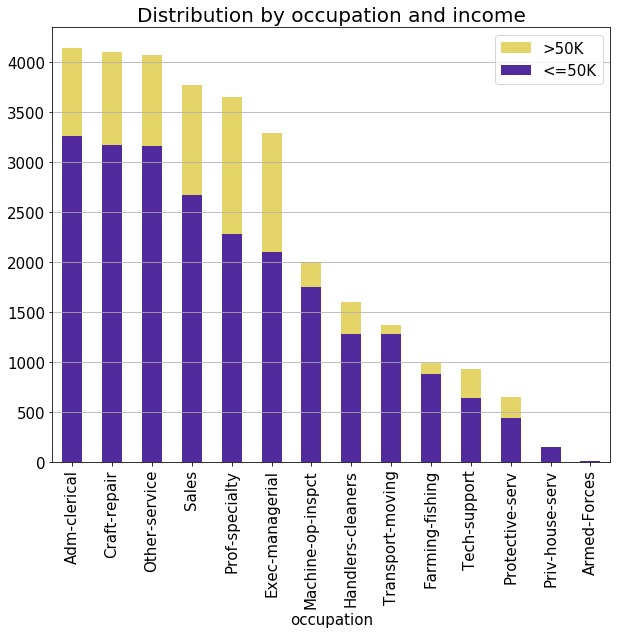

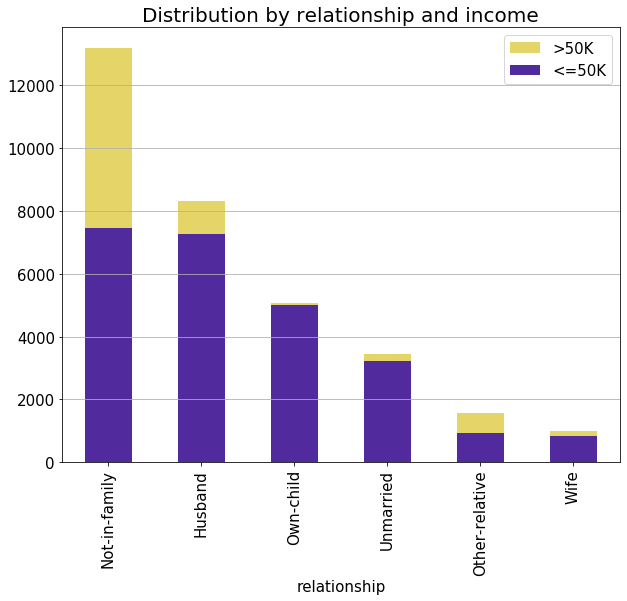

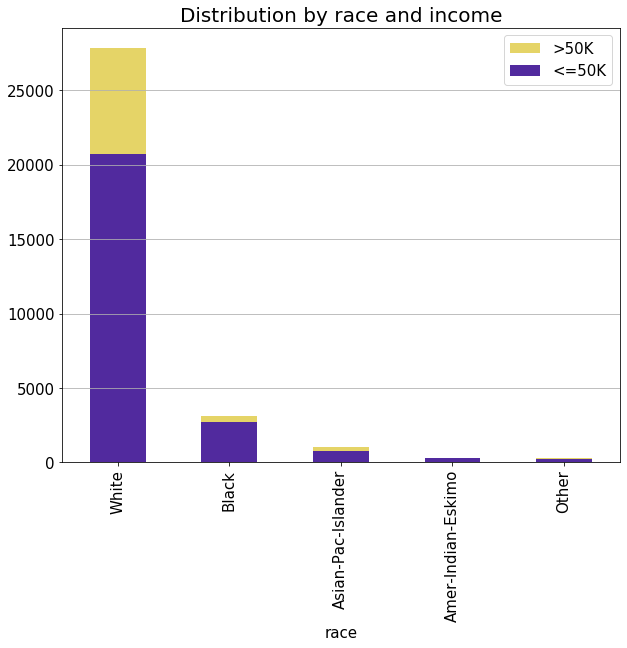

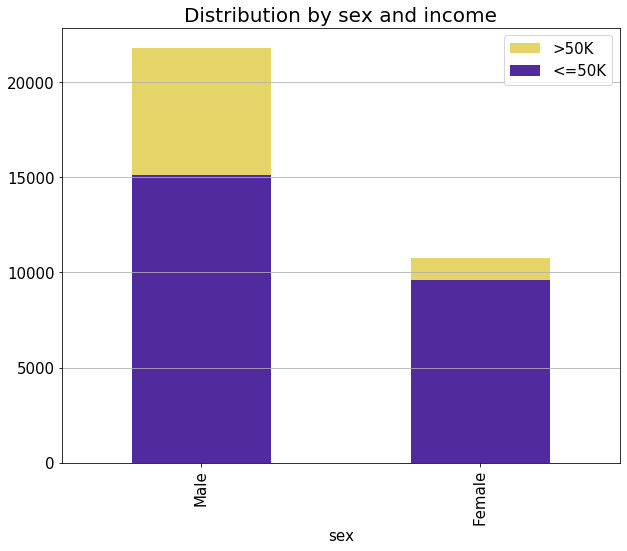

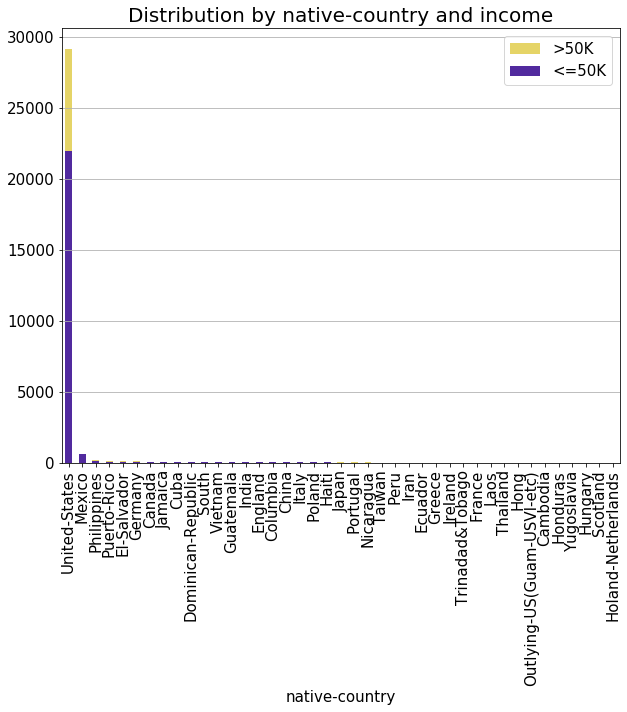

In [20]:
for var in lst_cat_vars:
    fig, ax = plt.subplots(figsize=(10,8))
    df[var].value_counts().plot.bar(color='#E5D467', label='>50K', fontsize=15)
    df[df['income']=='<=50K'][var].value_counts().plot.bar(color='#512A9E', label='<=50K', fontsize=15)
    plt.legend(loc = 'upper right', fontsize=15)
    title = 'Distribution by '+var+' and income'
    plt.title(title, fontsize=20)
    plt.xlabel(var, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(axis='y')
    plt.show()

# Continuous variables

In [22]:
lst_cont_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

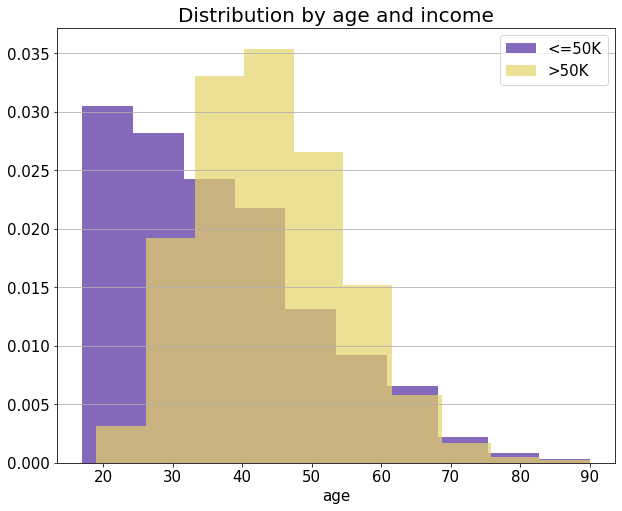

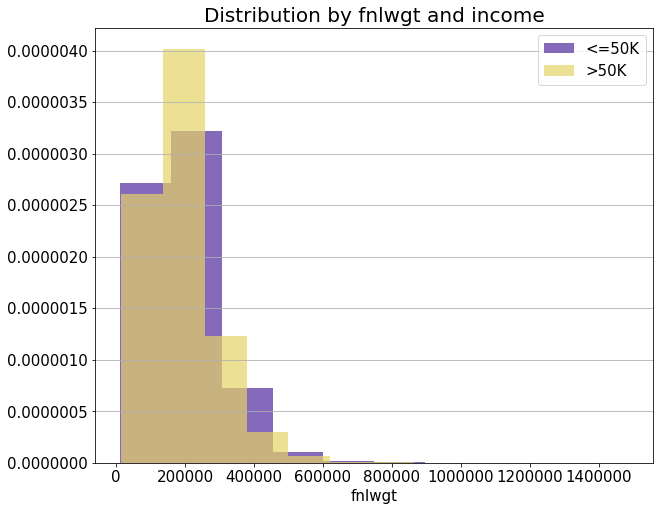

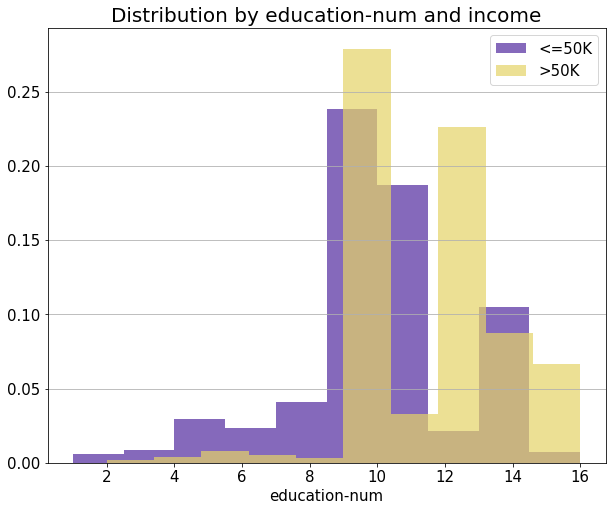

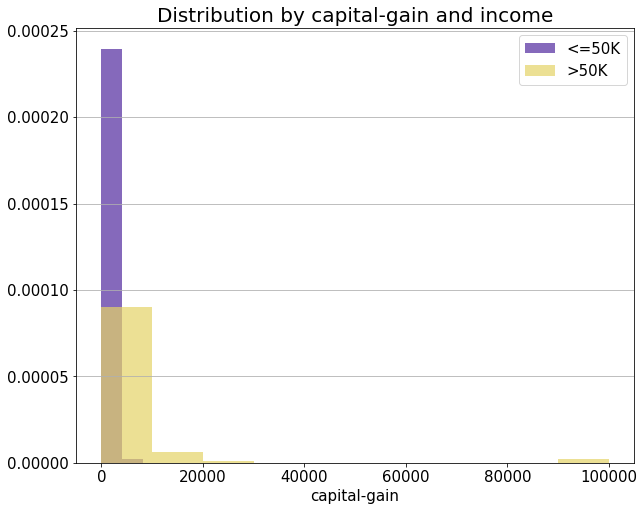

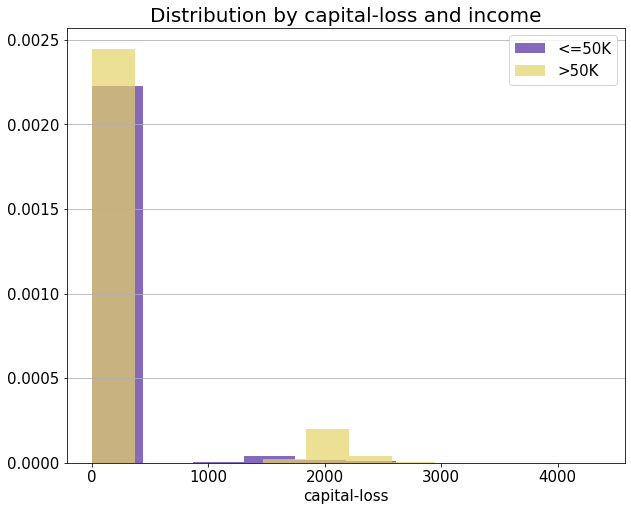

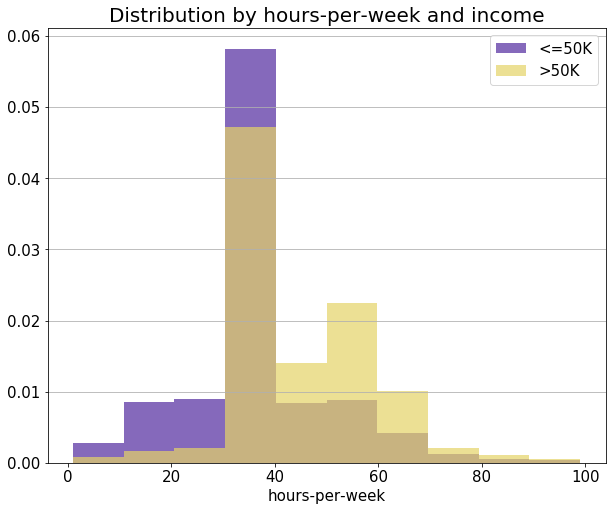

In [23]:
for var in lst_cont_vars:
    fig, ax = plt.subplots(figsize=(10,8))
    plt.hist(df[df['income']=='<=50K'][var], density=True, histtype='barstacked', alpha=0.7, color='#512A9E', label='<=50K')
    plt.hist(df[df['income']=='>50K'][var], density=True, histtype='barstacked', alpha=0.7, color='#E5D467', label='>50K')
    plt.legend(loc = 'upper right', fontsize=15)
    title = 'Distribution by '+var+' and income'
    plt.title(title, fontsize=20)
    plt.xlabel(var, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(axis='y')
    plt.show()